In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [72]:
data = pd.read_csv("default of credit card clients.csv")

In [73]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [74]:
results = data.default_payment_next_month
results.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [75]:
variables = data.drop('default_payment_next_month', axis = 1)
variables.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [76]:
X_train, X_test, y_train, y_test = train_test_split(variables, results, random_state = 24)

In [77]:
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=24, splitter='best')

In [78]:
def test_accuracy_report(model):
    y_pred = model.predict(X_test)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))

In [79]:
training_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print('Training score: ', training_score)
print('Test score: ', test_score)

Training score:  1.0
Test score:  0.7237333333333333


In [95]:
rf = RandomForestClassifier(criterion='gini',n_estimators = 75, random_state=24)
rf.fit(X_train, y_train)
test_accuracy_report(rf)

Accuracy score:  0.8145333333333333


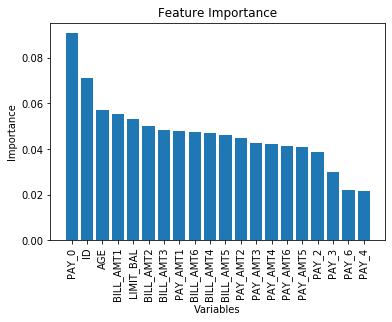

In [83]:
# Calculate feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [variables.columns[i] for i in indices]

# Create plot
fig = plt.figure()

# Create plot title
plt.title("Feature Importance")
x = 20
# Add bars
plt.bar(range(x), importances[indices][:x])

# Add feature names as x-axis labels
plt.xticks(range(x), names[:x], rotation=90)

plt.xlabel('Variables')
plt.ylabel('Importance')
# Show plot
plt.show()
# fig.savefig('plot.png', bbox_inches = 'tight', transparent = True) # Save file as plot.png

In [85]:
# Rohit Code
text_clf = Pipeline([
    ('vect', TfidfVectorizer(ngram_range = (1, 2))),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=30, max_depth=40, min_samples_split=2, min_samples_leaf=2)),
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print("Model accuracy is",accuracy_score(y_test, predicted))

x_increments = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)

train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=42, n_estimators=30, max_depth=40, min_samples_split=2), X_train_tfidf, y_train, "min_samples_leaf", x_increments , cv=5)

for x,i in enumerate(train_scores):
    train_scores[x] = np.mean(i)

for x,i in enumerate(valid_scores):
    valid_scores[x] = np.mean(i)

print(train_scores)
print(valid_scores)
plt.plot(x_increments, train_scores, label='train')

plt.plot(x_increments, valid_scores, label='valid')
plt.legend()
plt.savefig('ValidCurve.png')

parameters = {
    'vectngram_range': [(1, 1), (1, 2), (1, 3)],
    'clfn_estimators': (650, 700, 750, 800, 850, 900),
    'clfmax_depth': (15, 20, 25),
    'clfmin_samples_split': (5, 10, 15, 20),
    'clf__min_samples_leaf': (2, 3),
}

""" gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1, verbose=1)
gs_clf = gs_clf.fit(X_train, y_train)
print(gs_clf.bestscore)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.bestparams[param_name])) """

NameError: name 'GridSearchCV' is not defined

In [98]:
parameters = {
    'n_estimators': (60, 90, 120),
    'max_depth': (15, 20, 25),
    'min_samples_split': (5, 10, 15, 20),
    'min_samples_leaf': (2, 3),
}

In [102]:
gs_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=1)
gs_clf = gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.0min finished


In [104]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))
print(gs_clf.best_score_)

max_depth: 15
min_samples_leaf: 3
min_samples_split: 20
n_estimators: 60
0.8196888888888889
